In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.target.values, test_size=0.1, random_state=2023
)

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print(f'R squared\t{r2_lr:.4f}')
print(f'MSE\t{mse_lr:.2f}')

R squared	0.5474
MSE	2934.28


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
import numpy as np
xs = np.array([-0.1, 0.18])
ys = np.dot(lr.coef_[0], xs) + lr.intercept_

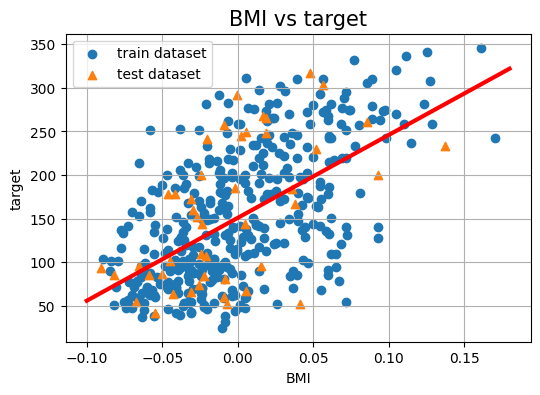

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label='train dataset')
plt.scatter(X_test, y_test, marker='^', label='test dataset')
plt.plot(xs, ys, 'r-', lw=3)
plt.grid(), plt.legend()
plt.xlabel('BMI'), plt.ylabel('target')
plt.title('BMI vs target', fontsize=15)
plt.show()

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)

In [22]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

In [24]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

In [25]:
print('\t\tLR\tRidge\tLasso\tSV\tRF\tXG')
print(f'R squared\t{r2_lr:.4f}\t{r2_rg:.4f}\t{r2_ls:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'Mean squared E\t{mse_lr:.2f}\t{mse_rg:.2f}\t{mse_ls:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xg:.2f}')

		LR	Ridge	Lasso	SV	RF	XG
R squared	0.5474	0.2111	0.2293	0.1712	0.0735	0.0590
Mean squared E	2934.28	5114.71	4996.56	5372.92	6006.49	6100.83
